# Module 2 Project Part 2

## Clustering

In [8]:
import pandas as pd

# Read in data 
climate_daily = pd.read_csv("fires_climate_daily.csv")
treecover_yearly = pd.read_csv("fires_treecover_yearly.csv")
fires_yearly = pd.read_csv("fires_yearly.csv")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics.pairwise import cosine_distances

# Data Prep
X = climate_daily[['fire_count', 'mean_frp']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)


[[-0.0934432  -0.05830915]
 [-0.20422676  0.33160017]
 [-0.0934432   0.5162103 ]
 ...
 [-0.2965464  -0.44535383]
 [-0.30577836 -0.44376237]
 [-0.30577836 -0.46413314]]


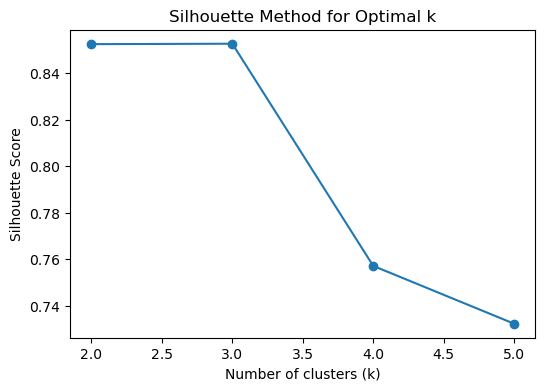

In [ ]:
# KMeans Clustering
silhouette_scores = {}
for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores[k] = score

# Plot silhouette scores
plt.figure(figsize=(6,4))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.show()

In [24]:
# KMeans k = 2
kmeans = KMeans(n_clusters=2, random_state=42)
climate_daily['kmeans_cluster'] = kmeans.fit_predict(X_scaled)
print(climate_daily['kmeans_cluster'].value_counts())

# KMeans k = 4
kmeans = KMeans(n_clusters=4, random_state=42)
climate_daily['kmeans_cluster'] = kmeans.fit_predict(X_scaled)
print(climate_daily['kmeans_cluster'].value_counts())

# Fit final KMeans with best k (highest silhouette score, k = 3)
kmeans = KMeans(n_clusters=3, random_state=42)
climate_daily['kmeans_cluster'] = kmeans.fit_predict(X_scaled)
print(climate_daily['kmeans_cluster'].value_counts())

kmeans_cluster
0    2374
1      91
Name: count, dtype: int64
kmeans_cluster
0    2195
1     246
2      22
3       2
Name: count, dtype: int64
kmeans_cluster
0    2387
1      51
2      27
Name: count, dtype: int64


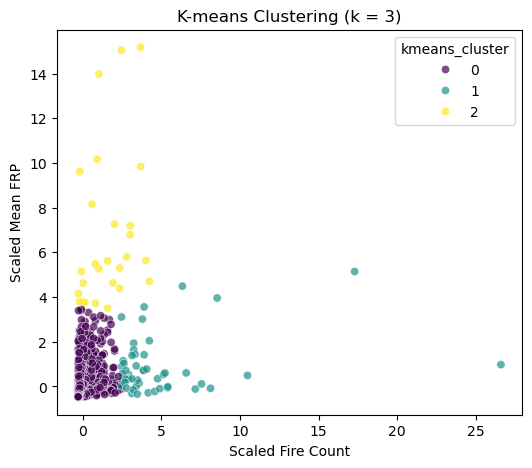

In [25]:
# Scatterplot of k-means clusters
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=climate_daily['kmeans_cluster'], palette='viridis', alpha=0.7)
plt.xlabel("Scaled Fire Count")
plt.ylabel("Scaled Mean FRP")
plt.title(f"K-means Clustering (k = 3)")
plt.show()

/var/folders/r3/tzdbl_qj34sbn29x3zvp8f640000gn/T/ipykernel_88471/2280380934.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(cosine_dist, method='average')  # average linkage works well with cosine


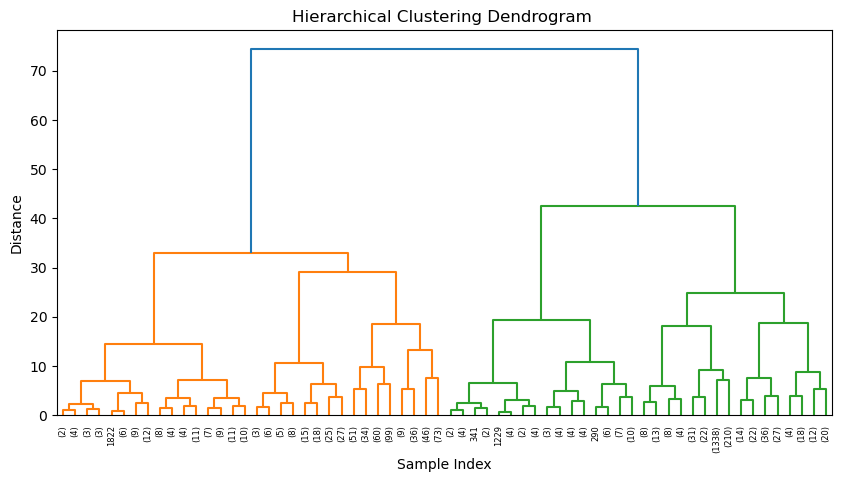

In [ ]:
# Hierarchical Clustering
# Compute cosine distance matrix
cosine_dist = cosine_distances(X_scaled)

# Perform hierarchical clustering (linkage)
Z = linkage(cosine_dist, method='average') 

# Dendrogram
plt.figure(figsize=(10,5))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


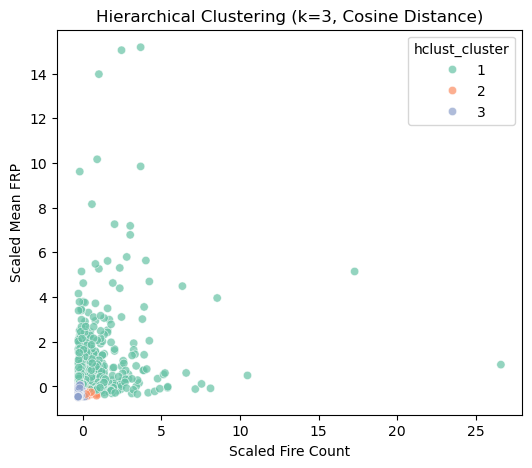

In [28]:
# Cut tree at k = best_k for comparison
hclust_labels = fcluster(Z, 3, criterion='maxclust')
climate_daily['hclust_cluster'] = hclust_labels

# Scatterplot for hierarchical clusters
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=climate_daily['hclust_cluster'], palette='Set2', alpha=0.7)
plt.xlabel("Scaled Fire Count")
plt.ylabel("Scaled Mean FRP")
plt.title(f"Hierarchical Clustering (k=3, Cosine Distance)")
plt.show()